## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out]) 
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [7]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.9184 - acc: 0.3140 - val_loss: 1.7692 - val_acc: 0.3738
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7082 - acc: 0.3963 - val_loss: 1.6675 - val_acc: 0.4108
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6265 - acc: 0.4229 - val_loss: 1.6084 - val_acc: 0.4244
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5634 - acc: 0.4469 - val_loss: 1.5805 - val_acc: 0.4399
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5241 - acc: 0.4610 - val_loss: 1.5183 - val_acc: 0.4660
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4741 - acc: 0.4770 - val_loss: 1.5249 - val_acc: 0.4591
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4421 - acc: 0.4910 - val_loss: 1.5041 - val_acc

50000/50000 [==============================] - 3s 54us/step - loss: 1.9640 - acc: 0.3119 - val_loss: 1.9158 - val_acc: 0.3256
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8848 - acc: 0.3405 - val_loss: 1.8558 - val_acc: 0.3487
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8353 - acc: 0.3567 - val_loss: 1.8141 - val_acc: 0.3656
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7968 - acc: 0.3705 - val_loss: 1.7812 - val_acc: 0.3752
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7666 - acc: 0.3819 - val_loss: 1.7530 - val_acc: 0.3859
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7401 - acc: 0.3896 - val_loss: 1.7293 - val_acc: 0.3947
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.7175 - acc: 0.3999 - val_loss: 1.7110 - val_acc: 0.4054
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1741 - acc: 0.2332 - val_loss: 2.1593 - val_acc: 0.2373
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.1455 - acc: 0.2438 - val_loss: 2.1327 - val_acc: 0.2504
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.1201 - acc: 0.2538 - val_loss: 2.1084 - val_acc: 0.2584
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.0971 - acc: 0.2630 - val_loss: 2.0868 - val_acc: 0.2692
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0766 - acc: 0.2716 - val_loss: 2.0672 - val_acc: 0.2767
Epoch 9/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.0580 - acc: 0.2788 - val_loss: 2.0497 - val_acc: 0.2837
Epoch 10/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0413 - acc: 0.2851 - val_loss: 2.0339 - val_acc: 0.2878
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 56us/step - loss: 2.2932 - acc: 0.1341 - val_loss: 2.2919 - val_acc: 0.1347
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2870 - acc: 0.1379 - val_loss: 2.2861 - val_acc: 0.1374
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.2814 - acc: 0.1431 - val_loss: 2.2808 - val_acc: 0.1426
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.2762 - acc: 0.1476 - val_loss: 2.2757 - val_acc: 0.1476
Epoch 9/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2712 - acc: 0.1524 - val_loss: 2.2709 - val_acc: 0.1531
Epoch 10/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.2664 - acc: 0.1566 - val_loss: 2.2662 - val_acc: 0.1569
Epoch 11/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.2618 - acc: 0.1606 - val_loss: 2.2617 - val_acc: 0.1614
Epoch 12/50
50000/50000 [=========================

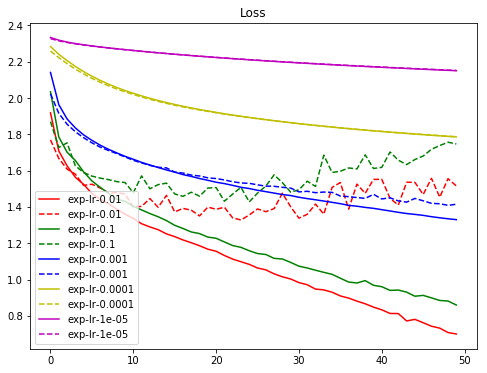

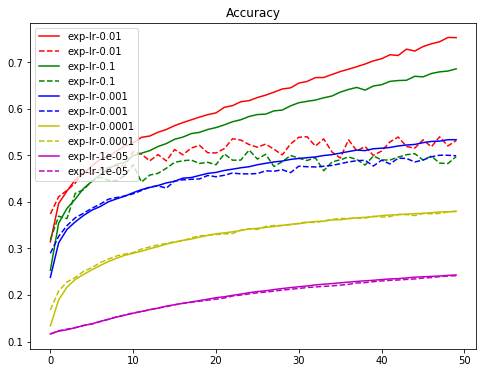

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()